In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/martin.molinero/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [6]:
pf_data.tail()


,PG,^GSPC
Date,,
2020-06-19,118.919998,3097.739990
2020-06-22,117.750000,3117.860107
2020-06-23,117.730003,3131.290039
2020-06-24,116.419998,3050.330078
2020-06-25,117.237000,3057.620117


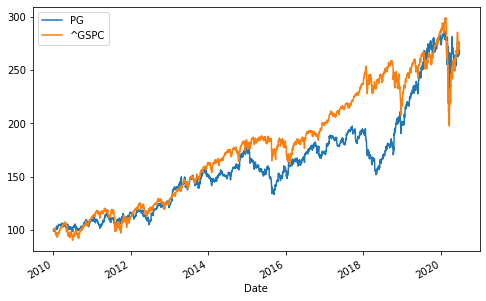

In [7]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(8,5))

In [8]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [10]:
log_returns.mean() * 250

PG       0.092783
^GSPC    0.094120
dtype: float64

In [11]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029533,0.017988
^GSPC,0.017988,0.030673


In [12]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597645
^GSPC,0.597645,1.000000


In [13]:
num_assets = len(assets)

In [14]:
num_assets

2

In [16]:
random_weights = np.random.random(2)
random_weights

array([0.97715227, 0.78464384])

In [17]:
random_weights[0] + random_weights[1]

1.7617961081126414

In [19]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.9392482, 0.0607518])

In [20]:
weights[0] + weights[1]

1.0

## Expected portfolio data


In [22]:
# expected return
np.sum(weights * log_returns.mean()) * 250

0.09286399769023015

In [25]:
# expected variance
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.028219822886544985

In [26]:
# volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.16798756765470765

In [28]:
pfolio_returns=[]
pfolio_volatilities=[]
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([0.09355611, 0.09389358, 0.0933901 , 0.09358201, 0.09314159,
        0.09360343, 0.09397287, 0.09357631, 0.09301046, 0.09343706,
        0.09356481, 0.09388255, 0.09307501, 0.0936851 , 0.09297513,
        0.09305833, 0.0928966 , 0.09304754, 0.09384409, 0.09402865,
        0.09363362, 0.09343349, 0.09334441, 0.09336626, 0.09338877,
        0.09378535, 0.09388217, 0.09312486, 0.09310652, 0.09293663,
        0.09354612, 0.09348214, 0.09278382, 0.09325402, 0.09348245,
        0.09297252, 0.09373938, 0.09364846, 0.09365274, 0.09314626,
        0.09383734, 0.09304683, 0.09334948, 0.09340785, 0.09339192,
        0.09344889, 0.09387164, 0.09337816, 0.09405947, 0.09377101,
        0.0934553 , 0.09360804, 0.09377951, 0.09359227, 0.09367876,
        0.09394347, 0.09362672, 0.09329459, 0.09400546, 0.0935174 ,
        0.09349976, 0.09319955, 0.09352686, 0.09348678, 0.09397083,
        0.09372675, 0.09392016, 0.09403805, 0.09355688, 0.09374286,
        0.09411739, 0.09355122, 0.09362766, 0.09

In [29]:
portfolios = pd.DataFrame({'Return':  pfolio_returns, 'Volatility': pfolio_volatilities})

In [30]:
portfolios.head()

,Return,Volatility
0,0.093556,0.155831
1,0.093894,0.164538
2,0.093390,0.155061
3,0.093582,0.156167
4,0.093142,0.158371


In [31]:
portfolios.tail()

,Return,Volatility
995,0.093603,0.156474
996,0.092852,0.168523
997,0.093949,0.166808
998,0.093381,0.155089
999,0.093053,0.160810


Text(0, 0.5, 'Expected return')

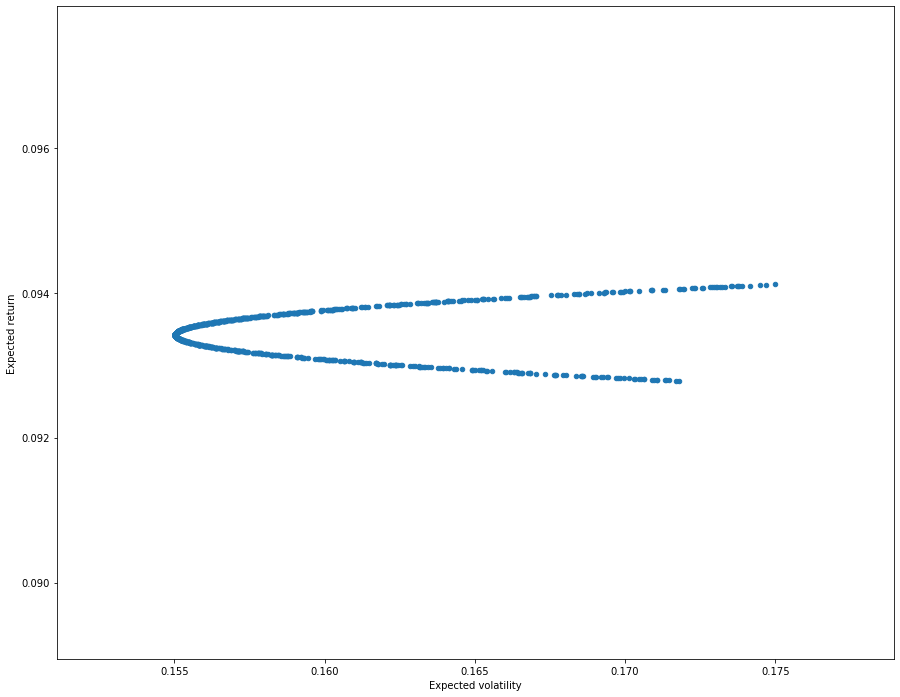

In [44]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,12))
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')